# Exploring dataset

In [45]:
# To support both python 2 and python 3

import itertools
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division, print_function, unicode_literals
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
# Common imports
import numpy as np
from tsne import *
%matplotlib inline
import matplotlib.pyplot as plt
import os
from pandas.tools.plotting import scatter_matrix


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join('.', fig_id + ".png")
    print("Saving figure", fig_id)

    plt.savefig(path, format='png', dpi=300)

# Get the data

In [4]:
import pandas as pd

DATASET_PATH='data'

def load_data(input_file='year-prediction-msd-train.txt',dataset_path=DATASET_PATH):
    csv_ = os.path.join(dataset_path,input_file)
    return pd.read_csv(csv_)


In [5]:
data = load_data()
data.head()

,2004,46.50128,-18.37096,58.89824,27.28181,1.93097,-2.43167,18.64843,-5.62769,-1.47711,...,43.94716,-64.21148,13.04284,156.03785,-2.42670,51.71977,-43.56703,10.63735,24.08962,-21.41886
0,2005,41.46015,-52.30140,-4.59825,-19.28084,-11.85844,-19.54192,1.30306,-1.83185,5.98469,...,-13.48435,-154.65715,35.22429,89.53649,-3.13145,-128.28120,89.97277,-15.88139,-75.21074,-0.51139
1,2009,42.18667,-85.65863,-7.91506,-11.84193,-12.61959,-21.66749,4.97883,-11.86750,9.87342,...,42.08584,-181.77349,43.00181,87.94977,-13.70362,136.49979,140.32633,11.51422,382.79589,29.98269
2,1987,46.90244,19.86314,10.92119,4.87136,-41.17499,-19.84156,2.93308,-5.98711,3.05997,...,-2.76407,-20.31782,-75.24506,125.81801,-15.50828,-63.31002,-142.21937,-12.36699,32.45911,-17.14909
3,2009,46.64388,-81.99503,41.62851,3.65855,-9.38201,-13.51749,7.48781,-7.03302,7.06982,...,12.29244,-143.25348,91.15842,-227.85481,7.75916,-41.32376,-225.66526,-4.05081,455.39458,41.65310
4,2010,40.08240,-106.24846,41.81955,2.03363,-16.44993,-2.90037,-22.26724,-2.94540,11.63992,...,65.00995,-190.08468,-94.97429,-9.73645,-3.29013,51.91596,-320.37894,-5.58047,83.48503,-4.19480


/Library/Python/2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


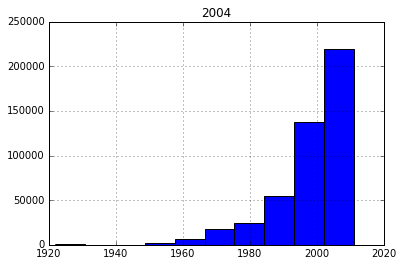

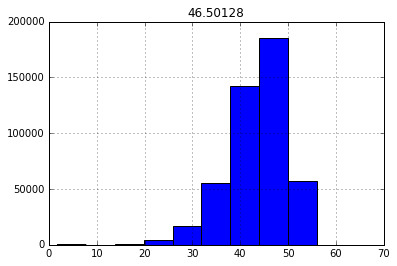

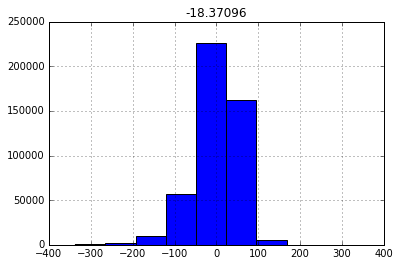

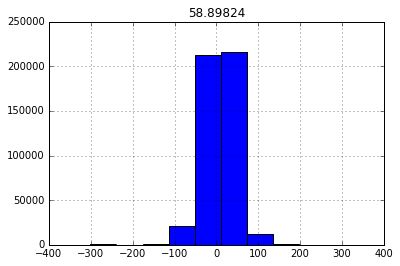

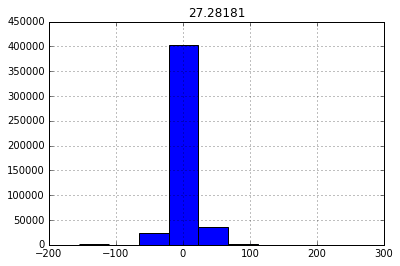

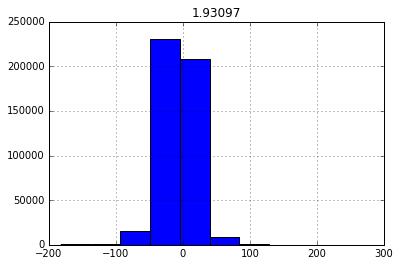

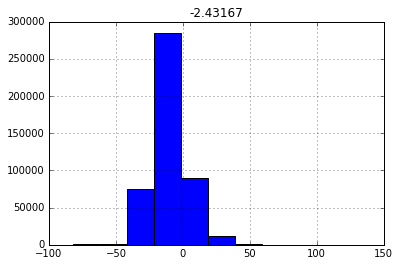

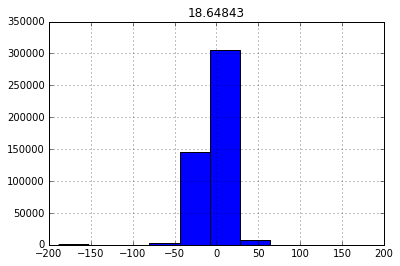

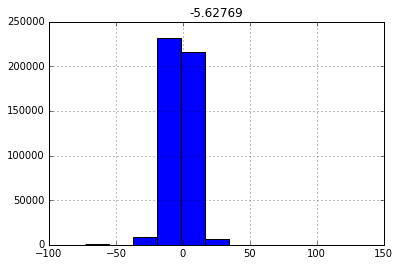

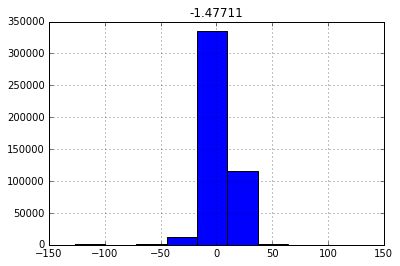

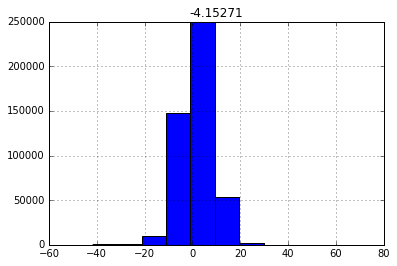

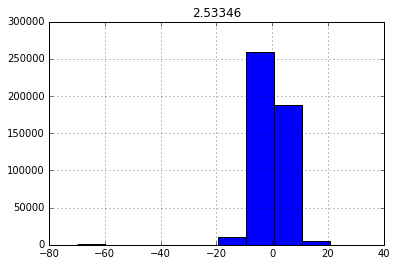

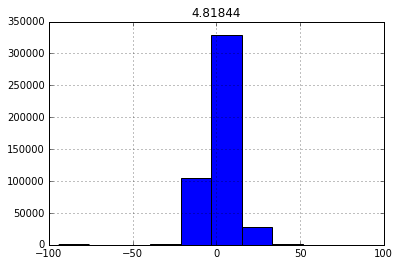

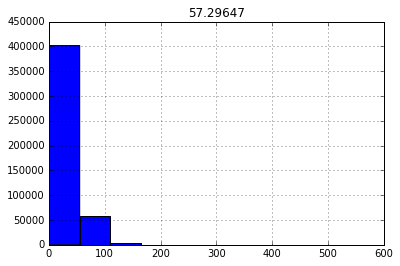

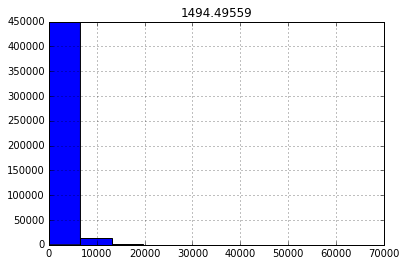

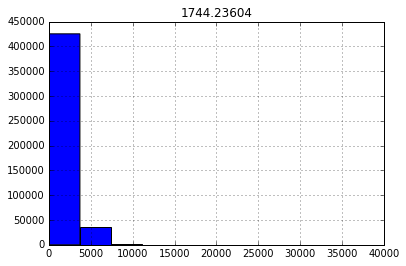

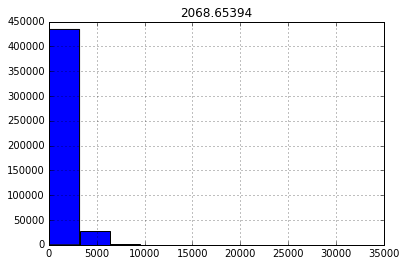

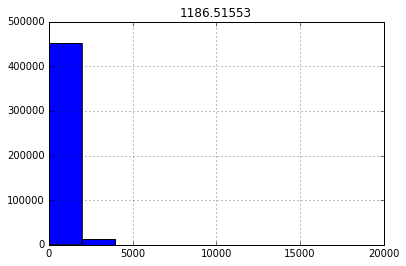

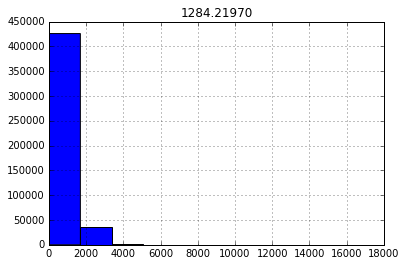

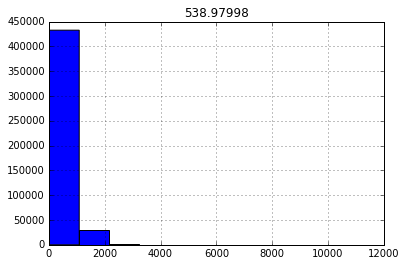

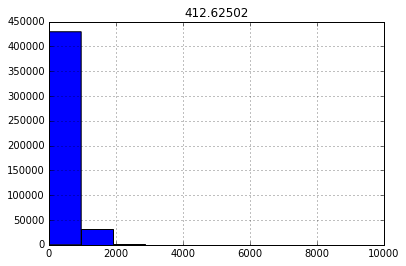

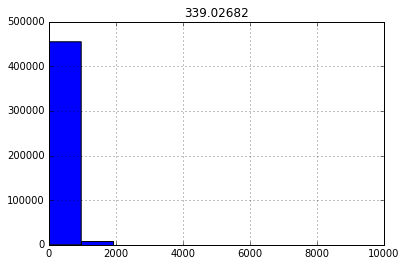

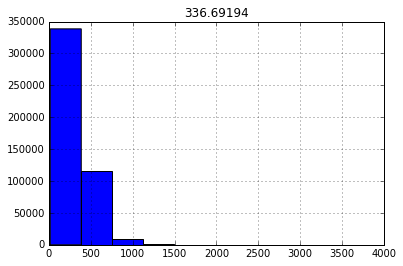

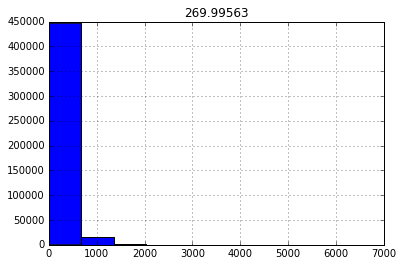

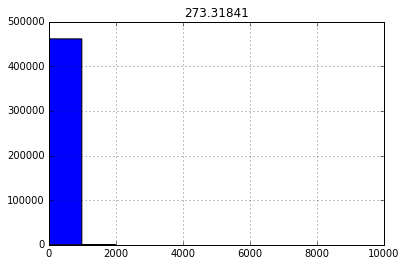

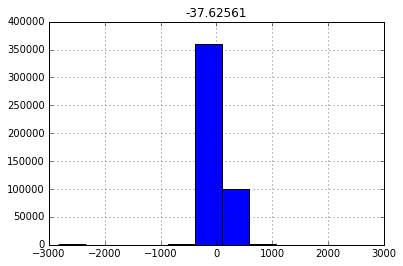

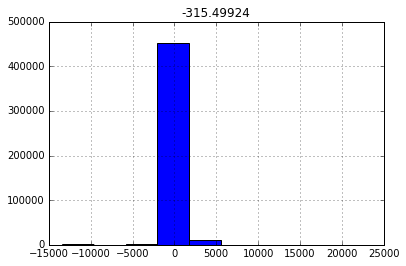

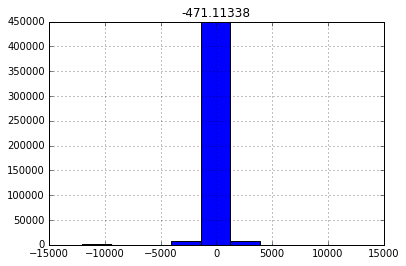

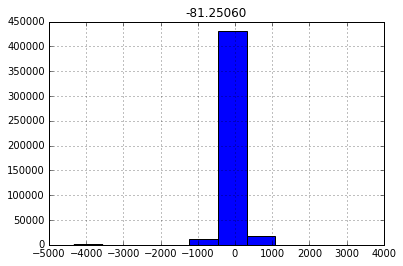

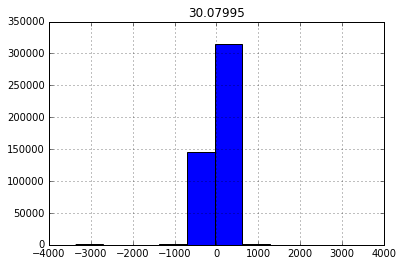

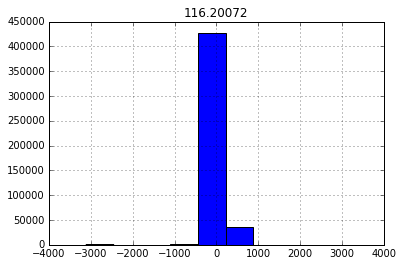

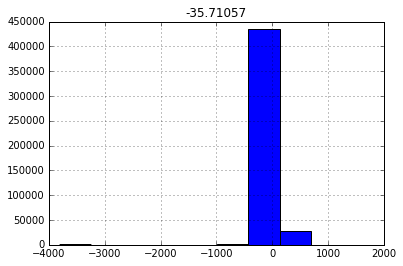

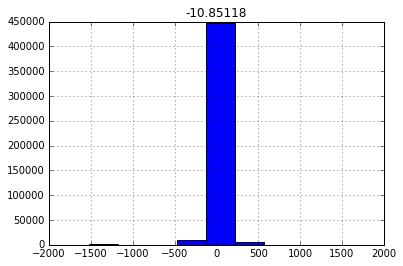

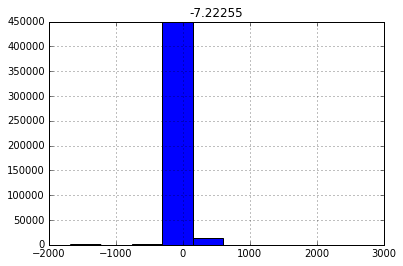

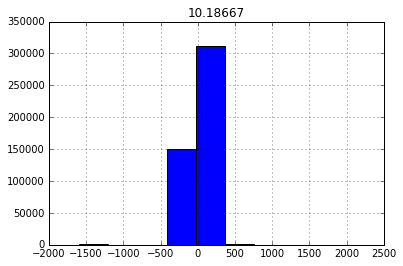

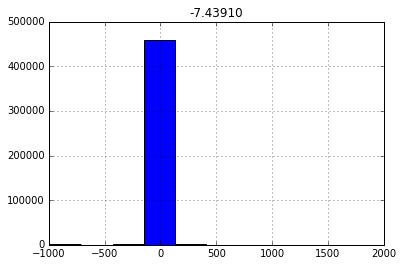

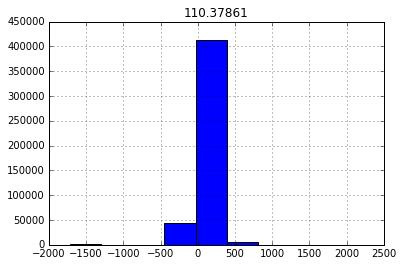

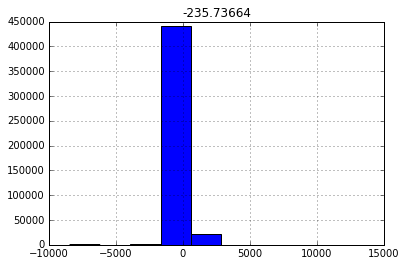

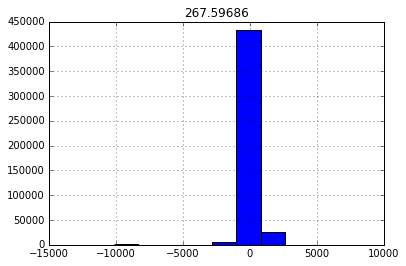

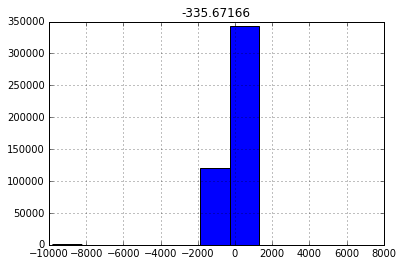

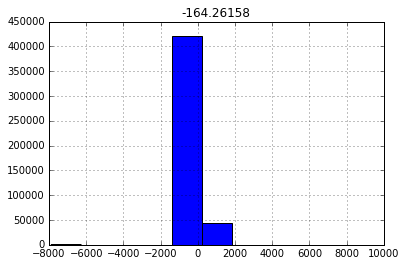

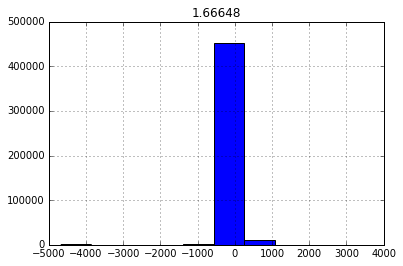

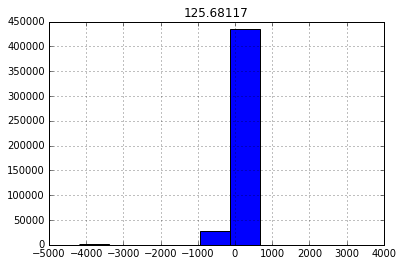

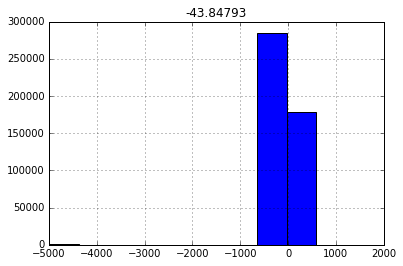

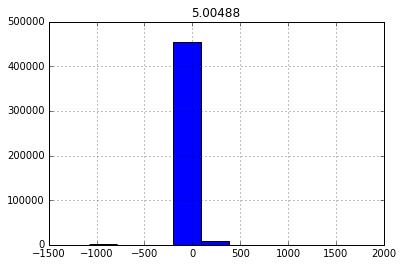

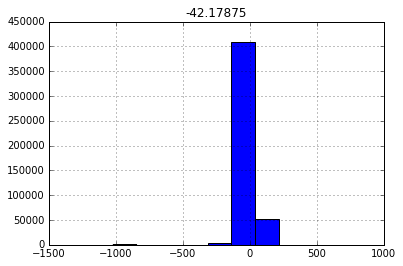

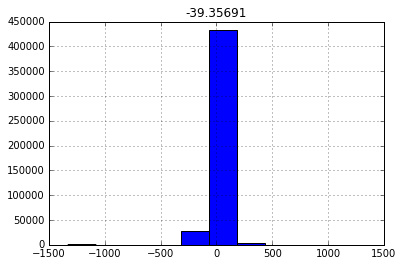

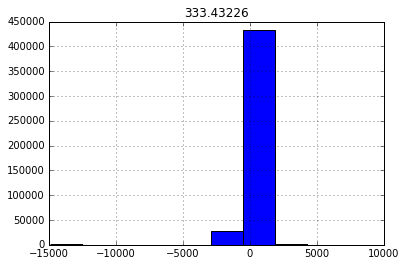

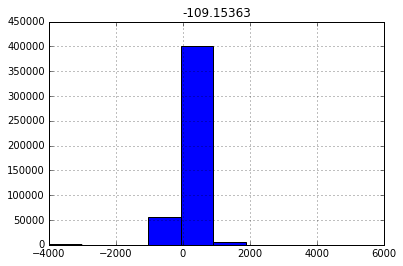

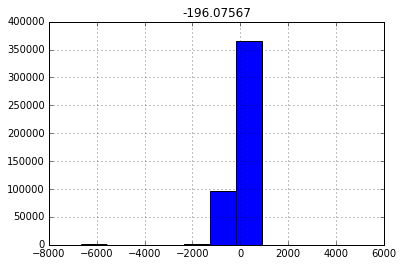

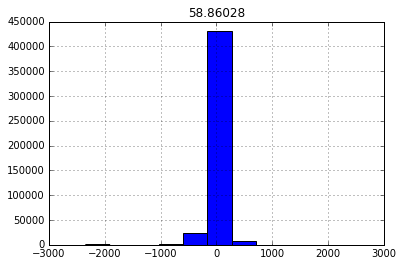

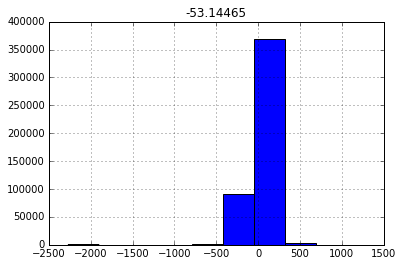

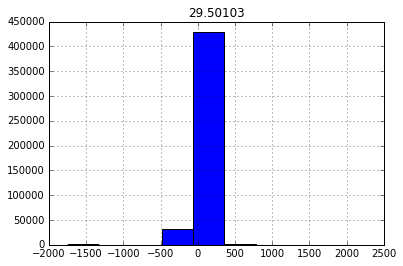

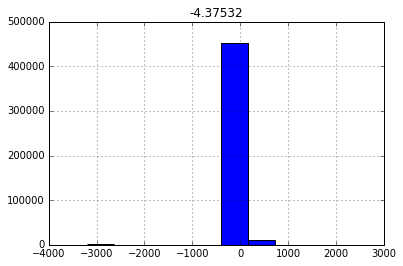

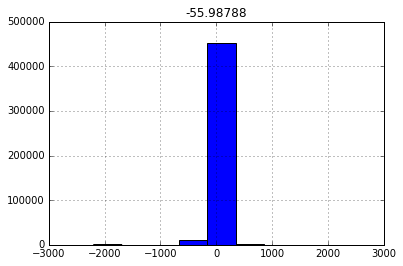

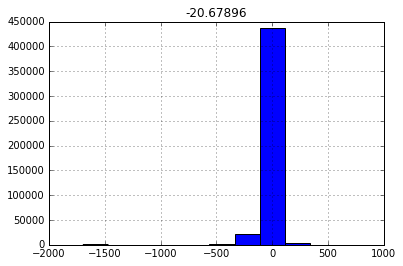

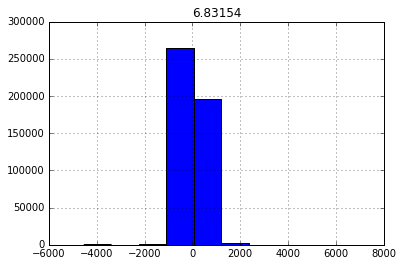

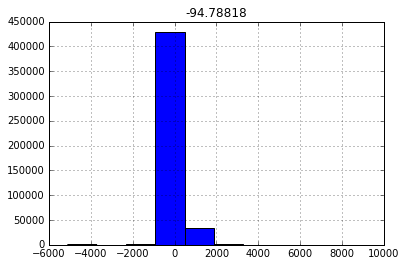

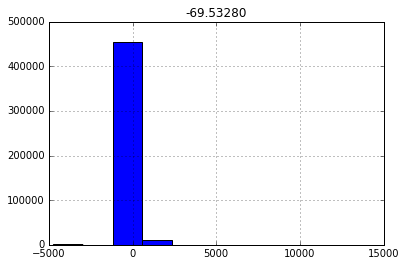

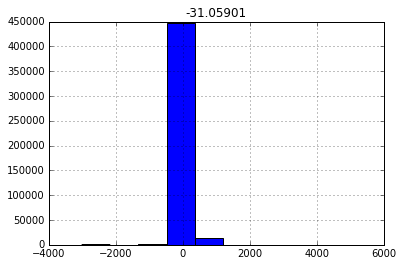

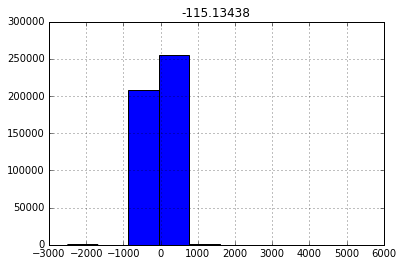

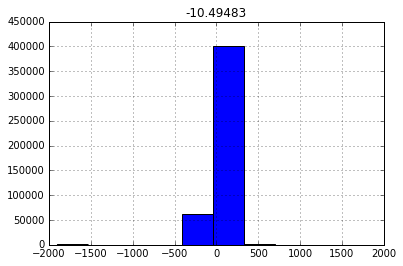

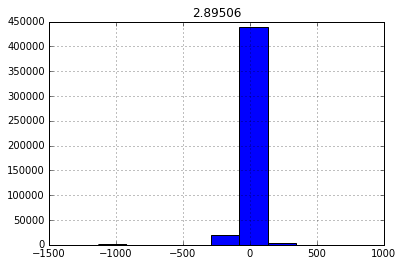

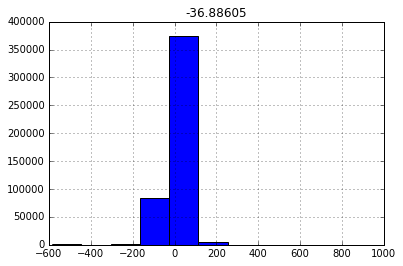

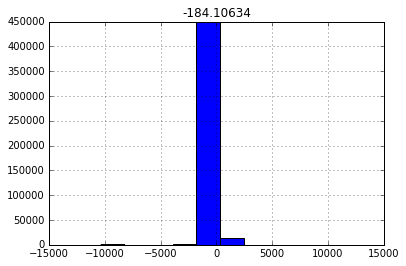

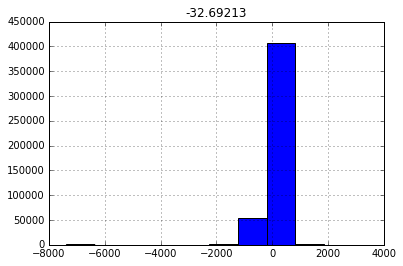

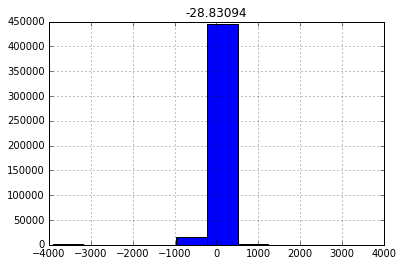

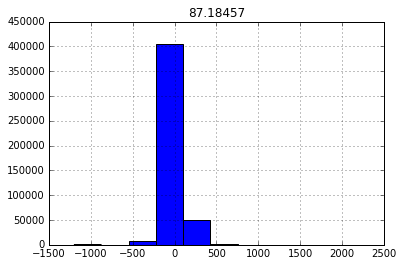

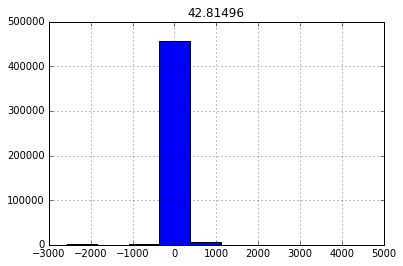

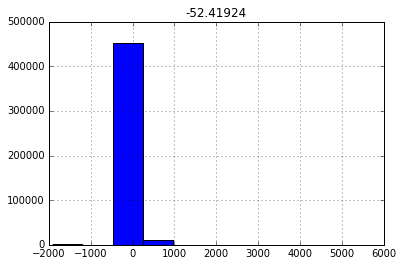

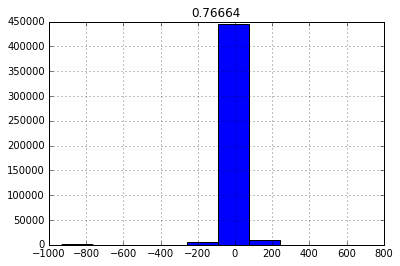

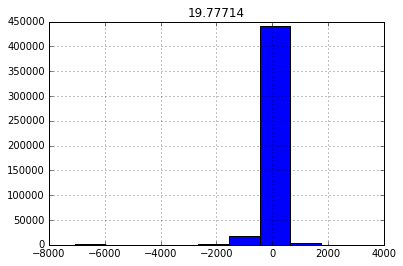

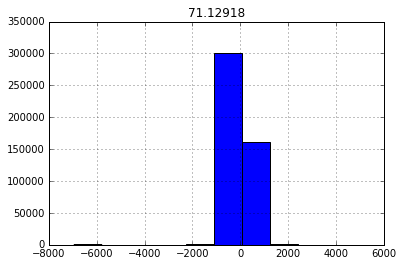

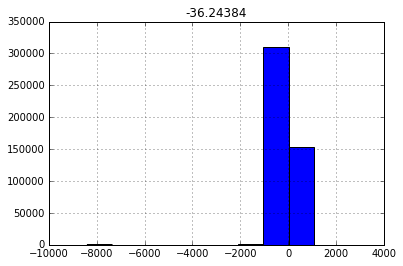

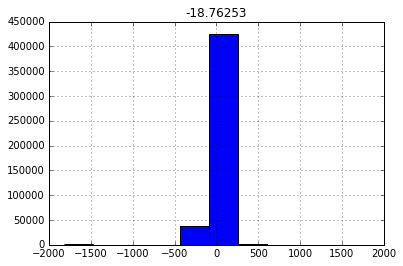

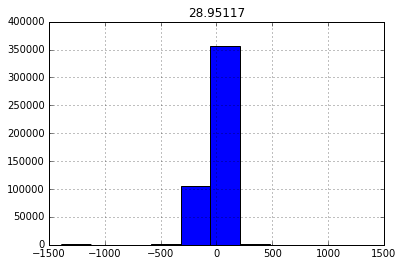

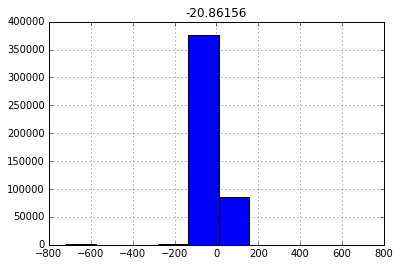

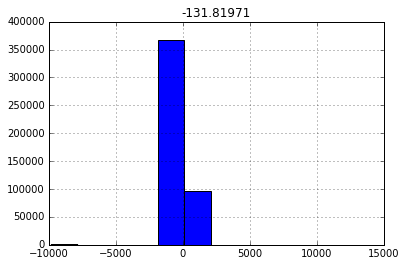

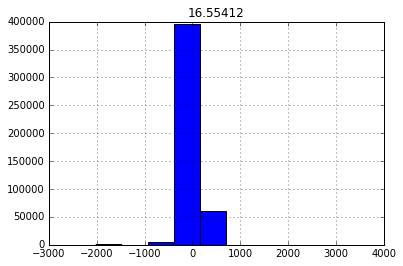

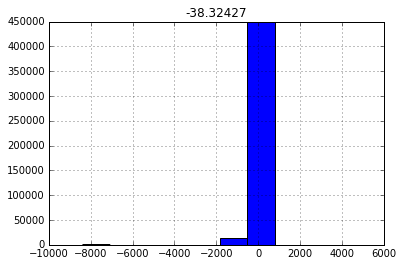

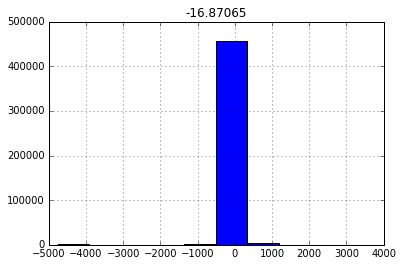

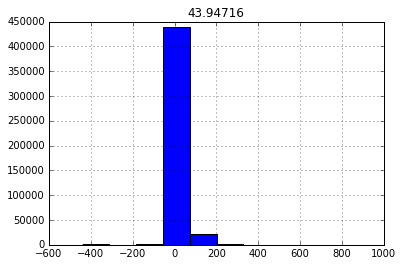

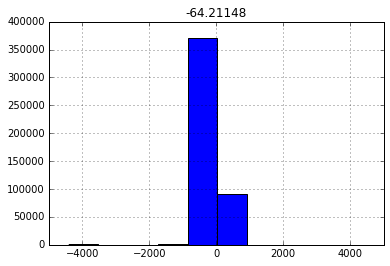

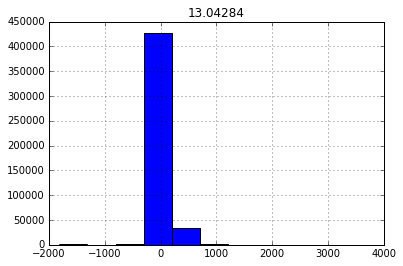

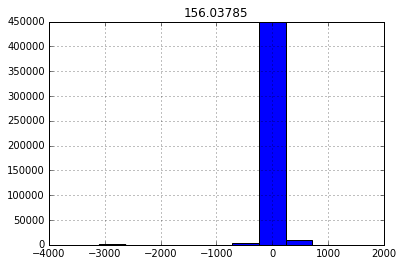

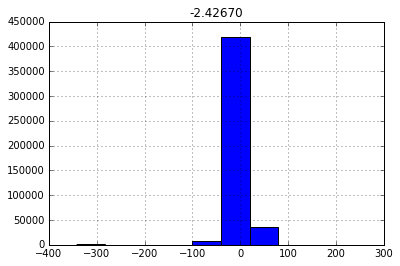

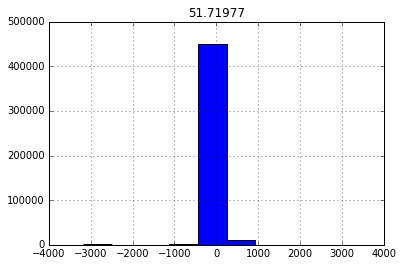

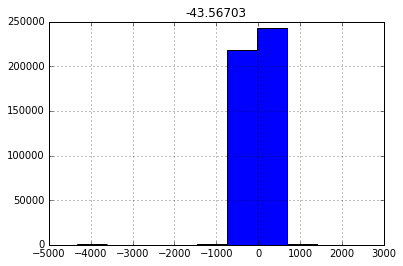

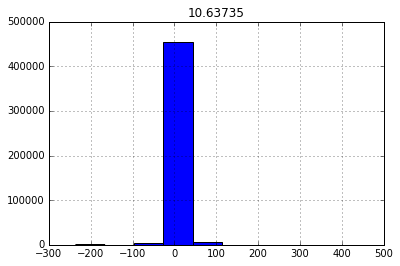

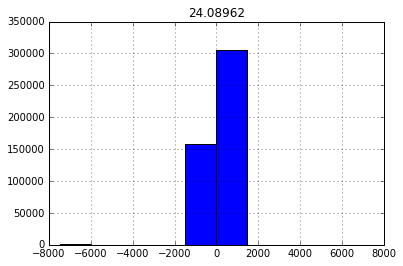

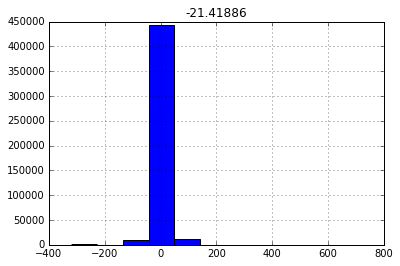

In [5]:
# understanding the features
for key in data.keys():
    data.hist(column=key)

In [6]:
#data.info()

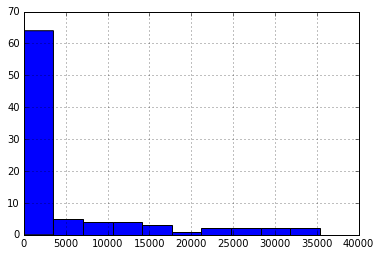

In [7]:
data['2004'].value_counts().hist()

In [8]:
data.describe()

,2004,46.50128,-18.37096,58.89824,27.28181,1.93097,-2.43167,18.64843,-5.62769,-1.47711,...,43.94716,-64.21148,13.04284,156.03785,-2.42670,51.71977,-43.56703,10.63735,24.08962,-21.41886
count,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,...,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000
mean,1998.386083,43.385481,1.261133,8.650087,1.130707,-6.512743,-9.565542,-2.384655,-1.793713,3.714596,...,15.743300,-73.067772,41.424037,37.780613,0.345265,17.599207,-26.364788,4.444971,19.739297,1.323375
std,10.939776,6.079144,51.613520,35.264711,16.334645,22.855841,12.836767,14.580228,7.961883,10.579250,...,32.086364,175.377061,121.794735,94.874417,16.153814,114.336634,174.188078,13.321007,184.843703,22.045403
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-318.223330
25%,1994.000000,39.957530,-26.153930,-11.442085,-8.515182,-20.636970,-18.468742,-10.776340,-6.461440,-2.303615,...,-1.798107,-139.062248,-20.918968,-4.711530,-6.758210,-31.563707,-101.396848,-2.572830,-59.598090,-8.813270
50%,2002.000000,44.262535,8.371830,10.470505,-0.691625,-5.992770,-11.208865,-2.047855,-1.735415,3.816840,...,9.161290,-52.877875,28.710045,33.494500,0.828350,15.554445,-21.122785,3.111035,7.586750,0.052855
75%,2006.000000,47.833655,36.143790,29.741037,8.756865,7.749595,-2.422585,6.515638,2.905130,9.951140,...,26.248237,13.620905,89.419997,77.674595,8.495722,67.743898,52.300195,9.948947,86.203762,9.670785
max,2011.000000,61.970140,384.065730,322.851430,289.527430,262.068870,119.815590,172.402680,105.210280,146.297950,...,840.973380,4469.454870,3210.701700,1672.647100,260.544900,3662.065650,2833.608950,463.419500,7393.398440,600.766240


Saving figure attribute_histogram_plots


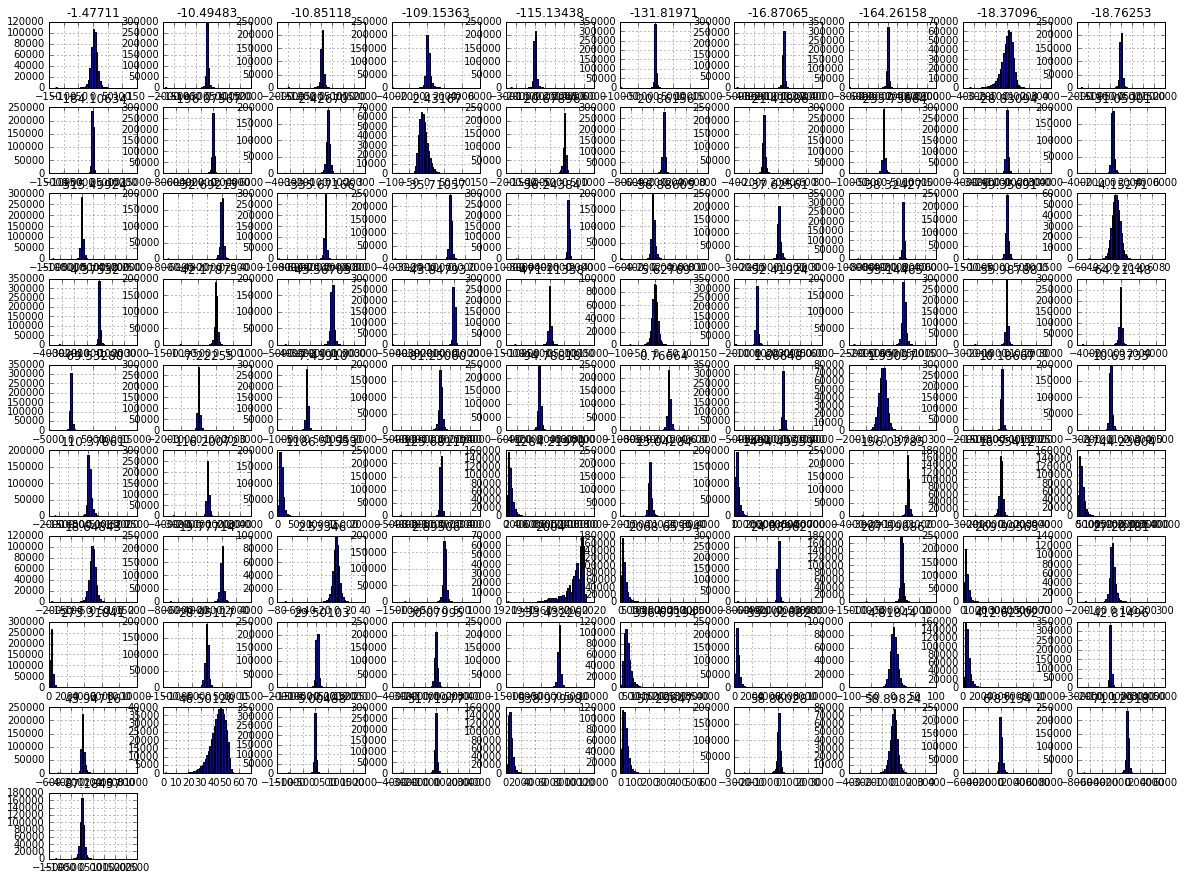

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Discover and visualize the data

In [10]:
#from pandas.tools.plotting import scatter_matrix

#attributes = ["2", "5", "6",
#              "10"]
#scatter_matrix(data[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

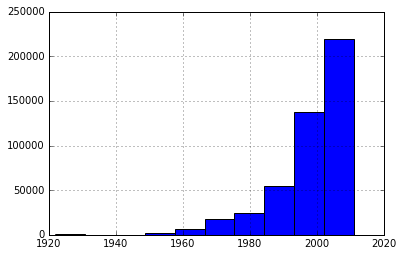

In [11]:
data['2004'].hist()

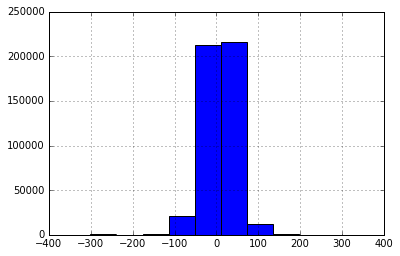

In [12]:
data['58.89824'].hist()

Saving figure scatter_matrix_plot


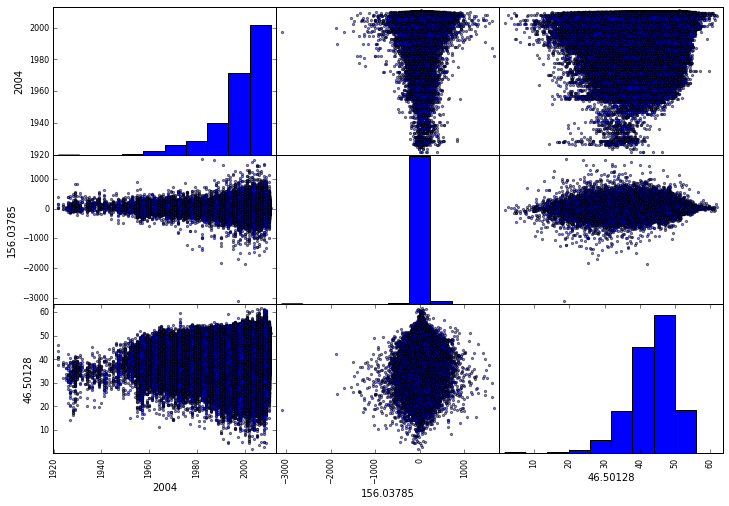

In [13]:


attributes = ["2004", "156.03785","46.50128"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

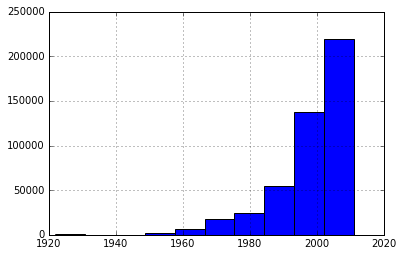

In [127]:
data['2004'].hist()

In [106]:
import pylab as Plt
feats = data.keys()

X=[]
y=[]
counter=0
for line in data.values:
        
    X.append(line[1:13])
    y.append(int(line[0]))

X,y = np.array(X),np.array(y)

print(X.shape, y.shape)

(463714, 12) (463714,)


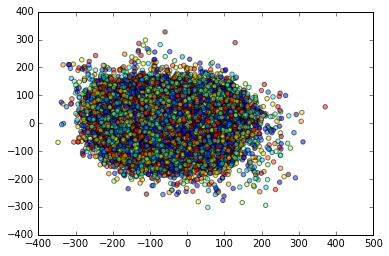

In [131]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
N = len(X_pca)

colors = np.random.rand(N)

plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=colors, alpha=0.5)
plt.show()

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [114]:
from sklearn.metrics import mean_absolute_error
preds = clf.predict(X_test)

score = mean_absolute_error(y_test, preds)

print(score)

7.21535926472


In [121]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=22)
    
    n_epochs = 1000
    train_errors, val_errors = [], []
    for epoch in range(n_epochs):
        model.partial_fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_absolute_error(y_train_predict, y_train))
        val_errors.append(mean_absolute_error(y_val_predict, y_val))

    best_epoch = np.argmin(val_errors)
    best_val_rmse = np.sqrt(val_errors[best_epoch])

    plt.annotate('Best model',
                 xy=(best_epoch, best_val_rmse),
                 xytext=(best_epoch, best_val_rmse + 1),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=16,
                )
    print(best_epoch, best_val_rmse)
    best_val_rmse -= 0.03  # just to make the graph look better
    plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    save_fig("early_stopping_plot")
    plt.show()
    
    return model
    

329 2.64197130226
Saving figure early_stopping_plot


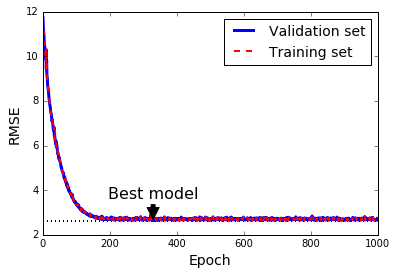

In [122]:
sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       loss='squared_loss',
                       warm_start=True)

model = plot_learning_curves(sgd_reg, X, y)


In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

y_pred = model.predict(X_test)

print("mse (validation) : ", mean_absolute_error(y_test,y_pred))

mse (validation) :  7.45127372698


996 3.07273440622
Saving figure early_stopping_plot


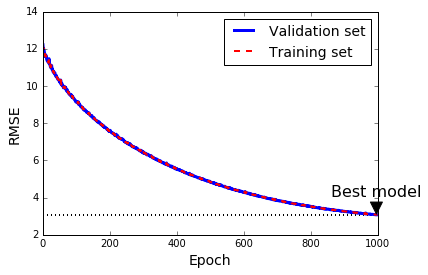

In [125]:
# analise dos learning rates
sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0001,
                       loss='squared_loss',
                       warm_start=True)

model = plot_learning_curves(sgd_reg, X, y)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

y_pred = model.predict(X_test)

print("mse (validation) : ", mean_absolute_error(y_test,y_pred))

mse (validation) :  9.46928939164


772 497467.518659
Saving figure early_stopping_plot


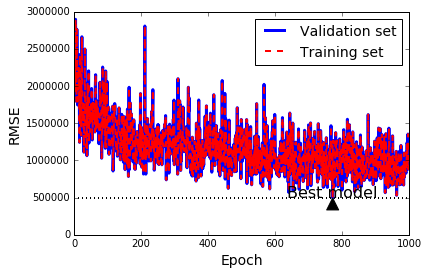

In [132]:
# analise dos learning rates
sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.05,
                       loss='squared_loss',
                       warm_start=True)

model = plot_learning_curves(sgd_reg, X, y)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

y_pred = model.predict(X_test)

print("mse (validation) : ", mean_absolute_error(y_test,y_pred))

mse (validation) :  1.09048374164e+12


643 2.63903120489
Saving figure early_stopping_plot


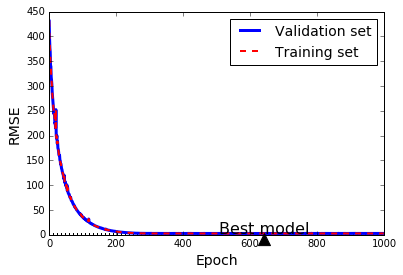

In [134]:
# analise dos learning rates
sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0009,
                       loss='squared_loss',
                       warm_start=True)

model = plot_learning_curves(sgd_reg, X, y)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

y_pred = model.predict(X_test)

print("mse (validation) : ", mean_absolute_error(y_test,y_pred))

mse (validation) :  7.55915225578
